In [1]:
import pandas as pd
from datasets import load_dataset

dataset = load_dataset("csebuetnlp/xlsum", 'indonesian')

Reusing dataset xlsum (C:\Users\assam\.cache\huggingface\datasets\csebuetnlp___xlsum\indonesian\2.0.0\518ab0af76048660bcc2240ca6e8692a977c80e384ffb18fdddebaca6daebdce)


  0%|          | 0/3 [00:00<?, ?it/s]

In [6]:
df = pd.DataFrame(dataset['test'])

In [7]:
df.head()

,id,url,title,summary,text
0,141105_seni_vangogh,https://www.bbc.com/indonesia/majalah/2014/11/...,"Lukisan bunga Van Gogh terjual US$61,8 juta","Sebuah mahakarya Vincent van Gogh, yang diluki...","Still Life, Vase with Daisies, and Poppies dib..."
1,dunia-49410599,https://www.bbc.com/indonesia/dunia-49410599,Mengapa pengungsi Suriah diminta segera mening...,Ribuan pengungsi Suriah punya waktu hingga Sel...,Foto tanggal 6 Agustus ini memperlihatkan kelu...
2,trensosial-38156839,https://www.bbc.com/indonesia/trensosial-38156839,Para pemain Chapecoense akan dikenang selamany...,"Ribuan orang berkumpul di kota Chapeco, Brasil...",Para keluarga korban berada di tengah fan yang...
3,160317_dunia_turki_kurdi_serangan,https://www.bbc.com/indonesia/dunia/2016/03/16...,Kelompok Kurdi TAK klaim mengebom Ankara,Kelompok militan Kurdi TAK mengatakan pihaknya...,Disebutkan oleh TAK bahwa korban sipil tak bis...
4,dunia-52171474,https://www.bbc.com/indonesia/dunia-52171474,Virus corona: Sejumlah dokter di India ‘diluda...,Sejumlah tenaga kesehatan di India dilaporkan ...,Para dokter di India bekerja lembur untuk meng...


In [8]:
df = df[['summary', 'text']]
df.head()

,summary,text
0,"Sebuah mahakarya Vincent van Gogh, yang diluki...","Still Life, Vase with Daisies, and Poppies dib..."
1,Ribuan pengungsi Suriah punya waktu hingga Sel...,Foto tanggal 6 Agustus ini memperlihatkan kelu...
2,"Ribuan orang berkumpul di kota Chapeco, Brasil...",Para keluarga korban berada di tengah fan yang...
3,Kelompok militan Kurdi TAK mengatakan pihaknya...,Disebutkan oleh TAK bahwa korban sipil tak bis...
4,Sejumlah tenaga kesehatan di India dilaporkan ...,Para dokter di India bekerja lembur untuk meng...


In [9]:
import re

# Remove non-alphabetic characters (Data Cleaning)
def text_strip(column):

    for row in column:
        row = re.sub("(\\t)", " ", str(row)).lower()
        row = re.sub("(\\r)", " ", str(row)).lower()
        row = re.sub("(\\n)", " ", str(row)).lower()

        # Remove _ if it occurs more than one time consecutively
        row = re.sub("(__+)", " ", str(row)).lower()

        # Remove - if it occurs more than one time consecutively
        row = re.sub("(--+)", " ", str(row)).lower()

        # Remove ~ if it occurs more than one time consecutively
        row = re.sub("(~~+)", " ", str(row)).lower()

        # Remove + if it occurs more than one time consecutively
        row = re.sub("(\+\++)", " ", str(row)).lower()

        # Remove . if it occurs more than one time consecutively
        row = re.sub("(\.\.+)", " ", str(row)).lower()

        # Remove the characters - <>()|&©ø"',;?~*!
        row = re.sub(r"[<>()|&©ø\[\]\'\",;?~*!]", " ", str(row)).lower()

        # Remove mailto:
        row = re.sub("(mailto:)", " ", str(row)).lower()

        # Remove \x9* in text
        row = re.sub(r"(\\x9\d)", " ", str(row)).lower()

        # Replace INC nums to INC_NUM
        row = re.sub("([iI][nN][cC]\d+)", "INC_NUM", str(row)).lower()

        # Replace CM# and CHG# to CM_NUM
        row = re.sub("([cC][mM]\d+)|([cC][hH][gG]\d+)", "CM_NUM", str(row)).lower()

        # Remove punctuations at the end of a word
        row = re.sub("(\.\s+)", " ", str(row)).lower()
        row = re.sub("(\-\s+)", " ", str(row)).lower()
        row = re.sub("(\:\s+)", " ", str(row)).lower()

        # Replace any url to only the domain name
        try:
            url = re.search(r"((https*:\/*)([^\/\s]+))(.[^\s]+)", str(row))
            repl_url = url.group(3)
            row = re.sub(r"((https*:\/*)([^\/\s]+))(.[^\s]+)", repl_url, str(row))
        except:
            pass

        # Remove multiple spaces
        row = re.sub("(\s+)", " ", str(row)).lower()

        # Remove the single character hanging between any two spaces
        row = re.sub("(\s+.\s+)", " ", str(row)).lower()

        yield row

In [10]:
processed_text = text_strip(df['text'])
processed_summary = text_strip(df['summary'])

In [11]:
import spacy
from time import time

nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser']) 

# Process text as batches and yield Doc objects in order
text = [str(doc) for doc in nlp.pipe(processed_text, batch_size=5000)]

summary = ['_START_ '+ str(doc) + ' _END_' for doc in nlp.pipe(processed_summary, batch_size=5000)]

OSError: [E941] Can't find model 'en'. It looks like you're trying to load a model from a shortcut, which is obsolete as of spaCy v3.0. To load the model, use its full name instead:

nlp = spacy.load("en_core_web_sm")

For more details on the available models, see the models directory: https://spacy.io/models. If you want to create a blank model, use spacy.blank: nlp = spacy.blank("en")

In [8]:
summary[0]

'_START_ seekor gajah mendadak mengamuk saat prosesi tahunan agama buddha di kolombo sri lanka sehingga membuat peserta upacara tunggang-langgang setidaknya 17 orang terluka. _END_'

In [9]:
df['cleaned_text'] = pd.Series(text)
df['cleaned_summary'] = pd.Series(summary)

In [10]:
df.head(2)

,summary,text,cleaned_text,cleaned_summary
0,Seekor gajah mendadak mengamuk saat prosesi ta...,"Dilaporkan dua orang terluka cukup serius, sem...",dilaporkan dua orang terluka cukup serius seme...,_START_ seekor gajah mendadak mengamuk saat pr...
1,Presiden Jokowi memutuskan untuk menghapus 14 ...,Proyek MRT Sudirman- Lebak Bulus tengah dikerj...,proyek mrt sudirman lebak bulus tengah dikerja...,_START_ presiden jokowi memutuskan untuk mengh...


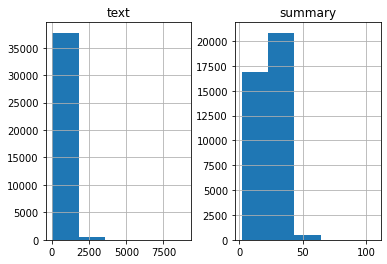

In [11]:
import matplotlib.pyplot as plt

text_count = []
summary_count = []

for sent in df['cleaned_text']:
    text_count.append(len(sent.split()))
    
for sent in df['cleaned_summary']:
    summary_count.append(len(sent.split()))

graph_df = pd.DataFrame() 

graph_df['text'] = text_count
graph_df['summary'] = summary_count

graph_df.hist(bins = 5)
plt.show()

In [12]:
# Check how much % of text have 0-100 words
cnt = 0
for i in df['cleaned_text']:
    if len(i.split()) <= 1500:
        cnt = cnt + 1
print(cnt / len(df['cleaned_text']))

0.9724909785053083


In [13]:
# Model to summarize the text between 0-15 words for Summary and 0-100 words for Text
max_text_len = 1500
max_summary_len = 60

In [14]:
# Select the Summaries and Text which fall below max length 

import numpy as np

cleaned_text = np.array(df['cleaned_text'])
cleaned_summary= np.array(df['cleaned_summary'])

short_text = []
short_summary = []

for i in range(len(cleaned_text)):
    if len(cleaned_summary[i].split()) <= max_summary_len and len(cleaned_text[i].split()) <= max_text_len:
        short_text.append(cleaned_text[i])
        short_summary.append(cleaned_summary[i])
        
post_pre = pd.DataFrame({'text': short_text,'summary': short_summary})

post_pre.head(2)

,text,summary
0,dilaporkan dua orang terluka cukup serius seme...,_START_ seekor gajah mendadak mengamuk saat pr...
1,proyek mrt sudirman lebak bulus tengah dikerja...,_START_ presiden jokowi memutuskan untuk mengh...


In [15]:
# Add sostok and eostok

post_pre['summary'] = post_pre['summary'].apply(lambda x: 'sostok ' + x \
        + ' eostok')

post_pre.head(2)

,text,summary
0,dilaporkan dua orang terluka cukup serius seme...,sostok _START_ seekor gajah mendadak mengamuk ...
1,proyek mrt sudirman lebak bulus tengah dikerja...,sostok _START_ presiden jokowi memutuskan untu...


In [16]:
from sklearn.model_selection import train_test_split

x_tr, x_val, y_tr, y_val = train_test_split(
    np.array(post_pre["text"]),
    np.array(post_pre["summary"]),
    test_size=0.1,
    random_state=0,
    shuffle=True,
)

In [17]:
# Tokenize the text to get the vocab count 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Prepare a tokenizer on training data
x_tokenizer = Tokenizer() 
x_tokenizer.fit_on_texts(list(x_tr))

In [18]:
thresh = 5

cnt = 0
tot_cnt = 0

for key, value in x_tokenizer.word_counts.items():
    tot_cnt = tot_cnt + 1
    if value < thresh:
        cnt = cnt + 1
    
print("% of rare words in vocabulary: ", (cnt / tot_cnt) * 100)

% of rare words in vocabulary:  68.7322563100297


In [19]:
# Prepare a tokenizer, again -- by not considering the rare words
x_tokenizer = Tokenizer(num_words = tot_cnt - cnt) 
x_tokenizer.fit_on_texts(list(x_tr))

# Convert text sequences to integer sequences 
x_tr_seq = x_tokenizer.texts_to_sequences(x_tr) 
x_val_seq = x_tokenizer.texts_to_sequences(x_val)

# Pad zero upto maximum length
x_tr = pad_sequences(x_tr_seq,  maxlen=max_text_len, padding='post')
x_val = pad_sequences(x_val_seq, maxlen=max_text_len, padding='post')

# Size of vocabulary (+1 for padding token)
x_voc = x_tokenizer.num_words + 1

print("Size of vocabulary in X = {}".format(x_voc))

Size of vocabulary in X = 52316


In [20]:
# Prepare a tokenizer on testing data
y_tokenizer = Tokenizer()   
y_tokenizer.fit_on_texts(list(y_tr))

thresh = 5

cnt = 0
tot_cnt = 0

for key, value in y_tokenizer.word_counts.items():
    tot_cnt = tot_cnt + 1
    if value < thresh:
        cnt = cnt + 1
    
print("% of rare words in vocabulary:",(cnt / tot_cnt) * 100)

# Prepare a tokenizer, again -- by not considering the rare words
y_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
y_tokenizer.fit_on_texts(list(y_tr))

# Convert text sequences to integer sequences 
y_tr_seq = y_tokenizer.texts_to_sequences(y_tr) 
y_val_seq = y_tokenizer.texts_to_sequences(y_val) 

# Pad zero upto maximum length
y_tr = pad_sequences(y_tr_seq, maxlen=max_summary_len, padding='post')
y_val = pad_sequences(y_val_seq, maxlen=max_summary_len, padding='post')

# Size of vocabulary (+1 for padding token)
y_voc = y_tokenizer.num_words + 1

print("Size of vocabulary in Y = {}".format(y_voc))

% of rare words in vocabulary: 69.61887477313975
Size of vocabulary in Y = 10045


In [21]:
# Remove empty Summaries, .i.e, which only have 'START' and 'END' tokens
ind = []

for i in range(len(y_tr)):
    cnt = 0
    for j in y_tr[i]:
        if j != 0:
            cnt = cnt + 1
    if cnt == 2:
        ind.append(i)

y_tr = np.delete(y_tr, ind, axis=0)
x_tr = np.delete(x_tr, ind, axis=0)

In [22]:
# Remove empty Summaries, .i.e, which only have 'START' and 'END' tokens
ind = []
for i in range(len(y_val)):
    cnt = 0
    for j in y_val[i]:
        if j != 0:
            cnt = cnt + 1
    if cnt == 2:
        ind.append(i)

y_val = np.delete(y_val, ind, axis=0)
x_val = np.delete(x_val, ind, axis=0)

## Model Encode Decode

In [23]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, \
    Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

In [24]:
latent_dim = 300
embedding_dim = 200

# Encoder
encoder_inputs = Input(shape=(max_text_len, ))

# Embedding layer
enc_emb = Embedding(x_voc, embedding_dim,
                    trainable=True)(encoder_inputs)

# Encoder LSTM 1
encoder_lstm1 = LSTM(latent_dim, return_sequences=True,
                     return_state=True, dropout=0.4,
                     recurrent_dropout=0.4)
(encoder_output1, state_h1, state_c1) = encoder_lstm1(enc_emb)

# Encoder LSTM 2
encoder_lstm2 = LSTM(latent_dim, return_sequences=True,
                     return_state=True, dropout=0.4,
                     recurrent_dropout=0.4)
(encoder_output2, state_h2, state_c2) = encoder_lstm2(encoder_output1)

# Encoder LSTM 3
encoder_lstm3 = LSTM(latent_dim, return_state=True,
                     return_sequences=True, dropout=0.4,
                     recurrent_dropout=0.4)
(encoder_outputs, state_h, state_c) = encoder_lstm3(encoder_output2)

# Set up the decoder, using encoder_states as the initial state
decoder_inputs = Input(shape=(None, ))

# Embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim, trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

# Decoder LSTM
decoder_lstm = LSTM(latent_dim, return_sequences=True,
                    return_state=True, dropout=0.4,
                    recurrent_dropout=0.2)
(decoder_outputs, decoder_fwd_state, decoder_back_state) = \
    decoder_lstm(dec_emb, initial_state=[state_h, state_c])

# Dense layer
decoder_dense = TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1500)]       0           []                               
                                                                                                  
 embedding (Embedding)          (None, 1500, 200)    10463200    ['input_1[0][0]']                
                                                                                                  
 lstm (LSTM)                    [(None, 1500, 300),  601200      ['embedding[0][0]']              
                                 (None, 300),                                                     
                                 (None, 300)]                                                     
                                                                                              

In [25]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

In [ ]:
history = model.fit(
    [x_tr, y_tr[:, :-1]],
    y_tr.reshape(y_tr.shape[0], y_tr.shape[1], 1)[:, 1:],
    epochs=50,
    callbacks=[es],
    batch_size=128,
    validation_data=([x_val, y_val[:, :-1]],
                     y_val.reshape(y_val.shape[0], y_val.shape[1], 1)[:
                     , 1:]),
    )

Epoch 1/50
